In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

def load_data(train_file, test_file, rul_file):
    """
    Load training, testing, and RUL data from CSV files.
    """
    train_data = pd.read_csv(train_file, header=None, delim_whitespace=True)
    test_data = pd.read_csv(test_file, header=None, delim_whitespace=True)
    rul_data = pd.read_csv(rul_file, header=None)
    return train_data, test_data, rul_data

def preprocess_data(train_data, test_data):
    """
    Preprocess the data by scaling the features.
    """
    scaler = StandardScaler()
    train_scaled = scaler.fit_transform(train_data)
    test_scaled = scaler.transform(test_data)
    return train_scaled, test_scaled

def build_ann_model(input_shape):
    """
    Build a simple Artificial Neural Network model.
    """
    model = Sequential([
        Dense(128, activation='relu', input_shape=input_shape),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
    return model

def train_and_evaluate_ann(train_data, test_data, rul_data, dataset_name):
    """
    Train and evaluate an Artificial Neural Network model.
    """
    print(f"Dataset: {dataset_name}")

    # Extract features and target variable
    X_train = train_data.drop(columns=[train_data.columns[-1]]).values
    y_train = train_data[train_data.columns[-1]].values
    X_test = test_data.drop(columns=[test_data.columns[-1]]).values
    y_test = test_data[test_data.columns[-1]].values

    # Preprocess data
    X_train_scaled, X_test_scaled = preprocess_data(X_train, X_test)

    # Build ANN model
    model = build_ann_model(input_shape=X_train_scaled.shape[1:])

    # Train the model
    history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

    # Evaluate the model
    loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)
    print("ANN Model Evaluation - Loss: {:.4f}, MAE: {:.4f}".format(loss, mae))
    print()

# Load and preprocess data for FD001
fd001_train, fd001_test, fd001_rul = load_data("/content/sample_data/train_FD001.txt",
                                               "/content/sample_data/test_FD001.txt",
                                               "/content/sample_data/RUL_FD001.txt")
train_and_evaluate_ann(fd001_train, fd001_test, fd001_rul, "FD001")

# Load and preprocess data for FD002
fd002_train, fd002_test, fd002_rul = load_data("/content/sample_data/train_FD002.txt",
                                               "/content/sample_data/test_FD002.txt",
                                               "/content/sample_data/RUL_FD002.txt")
train_and_evaluate_ann(fd002_train, fd002_test, fd002_rul, "FD002")

# Load and preprocess data for FD003
fd003_train, fd003_test, fd003_rul = load_data("/content/sample_data/train_FD003.txt",
                                               "/content/sample_data/test_FD003.txt",
                                               "/content/sample_data/RUL_FD003.txt")
train_and_evaluate_ann(fd003_train, fd003_test, fd003_rul, "FD003")

# Load and preprocess data for FD004
fd004_train, fd004_test, fd004_rul = load_data("/content/sample_data/train_FD004.txt",
                                               "/content/sample_data/test_FD004.txt",
                                               "/content/sample_data/RUL_FD004.txt")
train_and_evaluate_ann(fd004_train, fd004_test, fd004_rul, "FD004")

def plot_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_actual_vs_predicted(y_test, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual RUL')
    plt.ylabel('Predicted RUL')
    plt.title('Actual vs Predicted RUL')
    plt.show()

def train_and_evaluate_ann(train_data, test_data, rul_data, dataset_name):
    # Other code...

    # Train the model
    history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

    # Visualize training history
    plot_loss(history)

    # Evaluate the model
    loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)
    print("ANN Model Evaluation - Loss: {:.4f}, MAE: {:.4f}".format(loss, mae))

    # Plotting actual vs predicted RUL
    y_pred = model.predict(X_test_scaled)
    plot_actual_vs_predicted(y_test, y_pred)

    print()

Dataset: FD001
Epoch 1/100
516/516 [==============================] - 2s 3ms/step - loss: 80.4661 - mean_absolute_error: 6.8508 - val_loss: 3.0109 - val_mean_absolute_error: 1.3932
Epoch 2/100
516/516 [==============================] - 1s 3ms/step - loss: 25.4325 - mean_absolute_error: 4.0518 - val_loss: 1.4835 - val_mean_absolute_error: 0.9357
Epoch 3/100
516/516 [==============================] - 2s 3ms/step - loss: 21.5593 - mean_absolute_error: 3.7236 - val_loss: 0.6485 - val_mean_absolute_error: 0.6380
Epoch 4/100
516/516 [==============================] - 1s 3ms/step - loss: 19.7694 - mean_absolute_error: 3.5731 - val_loss: 0.7607 - val_mean_absolute_error: 0.7484
Epoch 5/100
516/516 [==============================] - 1s 3ms/step - loss: 18.9334 - mean_absolute_error: 3.4895 - val_loss: 1.5084 - val_mean_absolute_error: 1.1451
Epoch 6/100
516/516 [==============================] - 2s 4ms/step - loss: 17.9520 - mean_absolute_error: 3.4010 - val_loss: 0.2301 - val_mean_absolute_err

Dataset: FD001
Epoch 1/100
516/516 [==============================] - 4s 5ms/step - loss: 75.3718 - mean_absolute_error: 6.6327 - val_loss: 3.7538 - val_mean_absolute_error: 1.5424
Epoch 2/100
516/516 [==============================] - 1s 3ms/step - loss: 23.4183 - mean_absolute_error: 3.9064 - val_loss: 1.4880 - val_mean_absolute_error: 0.9857
Epoch 3/100
516/516 [==============================] - 2s 3ms/step - loss: 19.6828 - mean_absolute_error: 3.5660 - val_loss: 0.8052 - val_mean_absolute_error: 0.7422
Epoch 4/100
516/516 [==============================] - 1s 3ms/step - loss: 18.1761 - mean_absolute_error: 3.4188 - val_loss: 0.9032 - val_mean_absolute_error: 0.8062
Epoch 5/100
516/516 [==============================] - 1s 3ms/step - loss: 16.9620 - mean_absolute_error: 3.3090 - val_loss: 0.9948 - val_mean_absolute_error: 0.8725
Epoch 6/100
516/516 [==============================] - 1s 2ms/step - loss: 15.7324 - mean_absolute_error: 3.1807 - val_loss: 1.1140 - val_mean_absolute_err

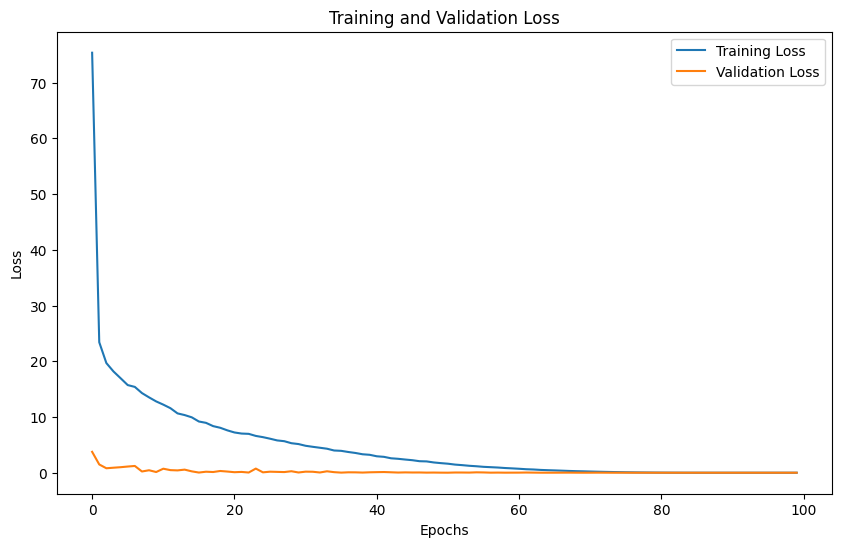

ANN Model Evaluation - Loss: 0.0040, MAE: 0.0507
410/410 [==============================] - 1s 2ms/step


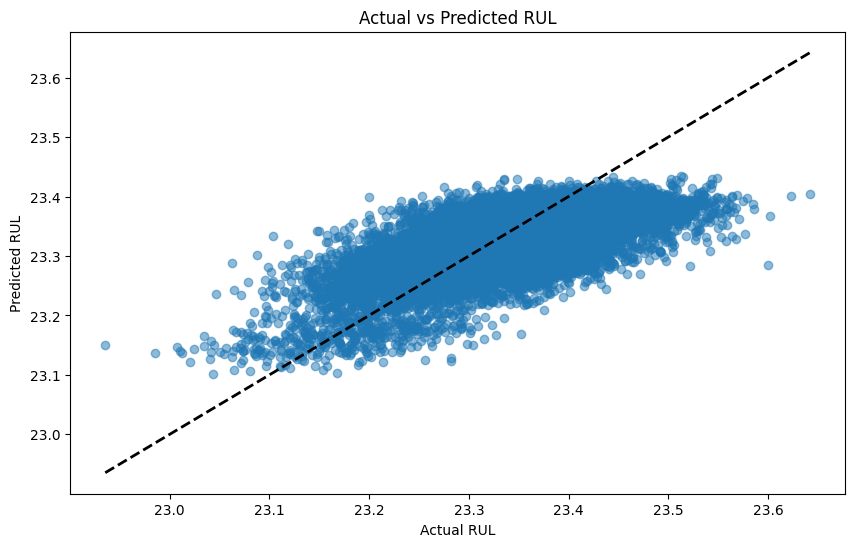


Dataset: FD002
Epoch 1/100
1344/1344 [==============================] - 6s 4ms/step - loss: 14.2078 - mean_absolute_error: 2.5748 - val_loss: 0.5112 - val_mean_absolute_error: 0.6081
Epoch 2/100
1344/1344 [==============================] - 4s 3ms/step - loss: 7.1873 - mean_absolute_error: 1.9325 - val_loss: 0.1748 - val_mean_absolute_error: 0.3490
Epoch 3/100
1344/1344 [==============================] - 4s 3ms/step - loss: 5.9856 - mean_absolute_error: 1.7252 - val_loss: 0.0352 - val_mean_absolute_error: 0.1522
Epoch 4/100
1344/1344 [==============================] - 5s 4ms/step - loss: 5.1864 - mean_absolute_error: 1.5797 - val_loss: 0.0987 - val_mean_absolute_error: 0.2817
Epoch 5/100
1344/1344 [==============================] - 4s 3ms/step - loss: 4.6688 - mean_absolute_error: 1.4722 - val_loss: 0.2056 - val_mean_absolute_error: 0.4188
Epoch 6/100
1344/1344 [==============================] - 4s 3ms/step - loss: 4.1461 - mean_absolute_error: 1.3761 - val_loss: 1.0856 - val_mean_abso

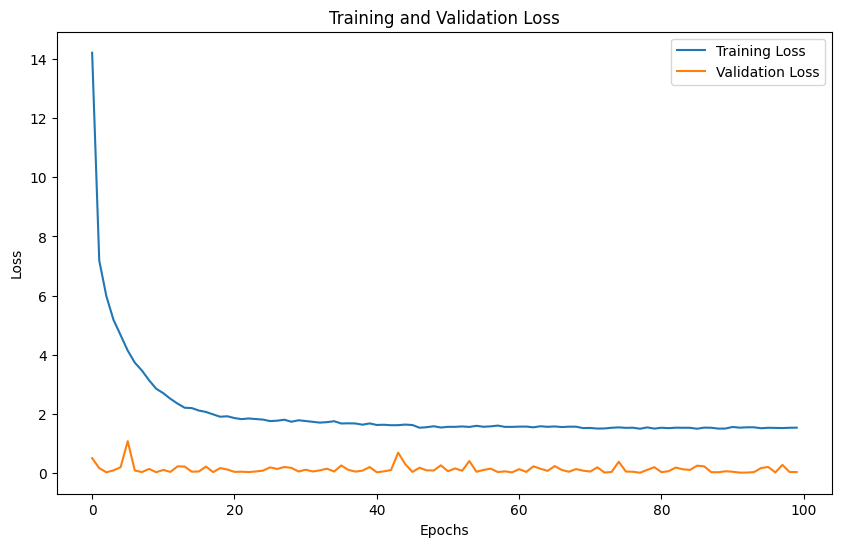

ANN Model Evaluation - Loss: 0.0379, MAE: 0.1541
1063/1063 [==============================] - 2s 2ms/step


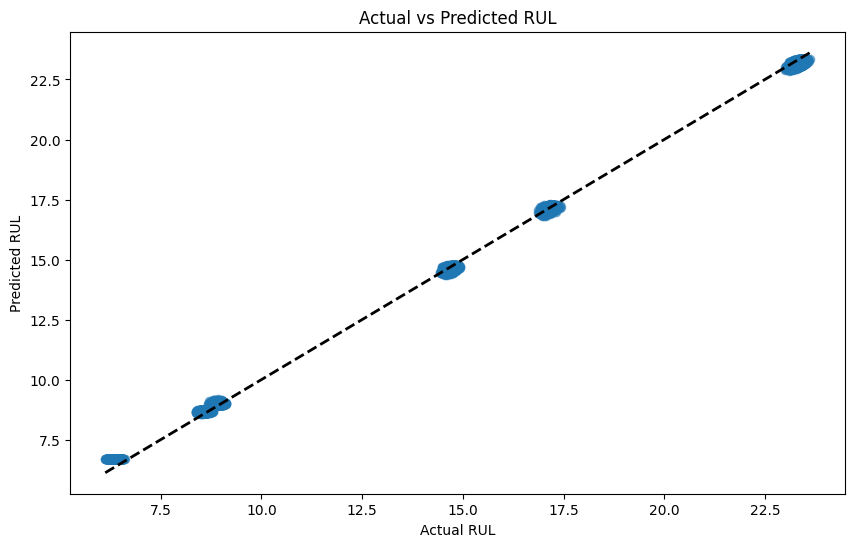

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

def load_data(train_file, test_file, rul_file):
    """
    Load training, testing, and RUL data from CSV files.
    """
    train_data = pd.read_csv(train_file, header=None, delim_whitespace=True)
    test_data = pd.read_csv(test_file, header=None, delim_whitespace=True)
    rul_data = pd.read_csv(rul_file, header=None)
    return train_data, test_data, rul_data

def preprocess_data(train_data, test_data):
    """
    Preprocess the data by scaling the features.
    """
    scaler = StandardScaler()
    train_scaled = scaler.fit_transform(train_data)
    test_scaled = scaler.transform(test_data)
    return train_scaled, test_scaled

def build_ann_model(input_shape):
    """
    Build a simple Artificial Neural Network model.
    """
    model = Sequential([
        Dense(128, activation='relu', input_shape=input_shape),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
    return model

def plot_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_actual_vs_predicted(y_test, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual RUL')
    plt.ylabel('Predicted RUL')
    plt.title('Actual vs Predicted RUL')
    plt.show()

def train_and_evaluate_ann(train_data, test_data, rul_data, dataset_name):
    """
    Train and evaluate an Artificial Neural Network model.
    """
    print(f"Dataset: {dataset_name}")

    # Extract features and target variable
    X_train = train_data.drop(columns=[train_data.columns[-1]]).values
    y_train = train_data[train_data.columns[-1]].values
    X_test = test_data.drop(columns=[test_data.columns[-1]]).values
    y_test = test_data[test_data.columns[-1]].values

    # Preprocess data
    X_train_scaled, X_test_scaled = preprocess_data(X_train, X_test)

    # Build ANN model
    model = build_ann_model(input_shape=X_train_scaled.shape[1:])

    # Train the model
    history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

    # Visualize training history
    plot_loss(history)

    # Evaluate the model
    loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)
    print("ANN Model Evaluation - Loss: {:.4f}, MAE: {:.4f}".format(loss, mae))

    # Plotting actual vs predicted RUL
    y_pred = model.predict(X_test_scaled)
    plot_actual_vs_predicted(y_test, y_pred)

    print()

# Load and preprocess data for FD001
fd001_train, fd001_test, fd001_rul = load_data("/content/sample_data/train_FD001.txt",
                                               "/content/sample_data/test_FD001.txt",
                                               "/content/sample_data/RUL_FD001.txt")
train_and_evaluate_ann(fd001_train, fd001_test, fd001_rul, "FD001")

# Load and preprocess data for FD002
fd002_train, fd002_test, fd002_rul = load_data("/content/sample_data/train_FD002.txt",
                                               "/content/sample_data/test_FD002.txt",
                                               "/content/sample_data/RUL_FD002.txt")
train_and_evaluate_ann(fd002_train, fd002_test, fd002_rul, "FD002")

# Load and preprocess data for FD003
fd003_train, fd003_test, fd003_rul = load_data("/content/sample_data/train_FD003.txt",
                                               "/content/sample_data/test_FD003.txt",
                                               "/content/sample_data/RUL_FD003.txt")

# Load and preprocess data for FD004
fd004_train, fd004_test, fd004_rul = load_data("/content/sample_data/train_FD004.txt",
                                               "/content/sample_data/test_FD004.txt",
                                               "/content/sample_data/RUL_FD004.txt")
